In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
# Load the dataset
df = pd.read_csv(r'C:\Users\Alex KADJE\Desktop\MEng Thesis\Thesis_data.csv')

In [12]:
df['Planting_Date'] = pd.to_datetime(df['Planting_Date'], errors='coerce')
df['Harvest_Date'] = pd.to_datetime(df['Harvest_Date'], errors='coerce')
df['Growing_Period_Days'] = (df['Harvest_Date'] - df['Planting_Date']).dt.days

In [14]:
# Spatiotemporal Analysis
print("=== Spatiotemporal Data Analysis ===")
print("\nUnique Years:", df['Year'].unique())
print("Unique Regions:", df['Region'].unique())
print("Total Records:", len(df))
print("Records with Complete Dates:", df.dropna(subset=['Planting_Date', 'Harvest_Date']).shape[0])
print("Average Growing Period (Days):", df['Growing_Period_Days'].mean())

=== Spatiotemporal Data Analysis ===

Unique Years: [2020 2021 2022 2023 2024 2018 2019]
Unique Regions: ['Western Highlands' 'Bafut' 'Fundong' 'Mbengwi' 'Kumbo' 'Ndop' 'Bali'
 'Batibo' 'Bambili' 'Santa' 'Jakiri']
Total Records: 25
Records with Complete Dates: 6
Average Growing Period (Days): 132.0


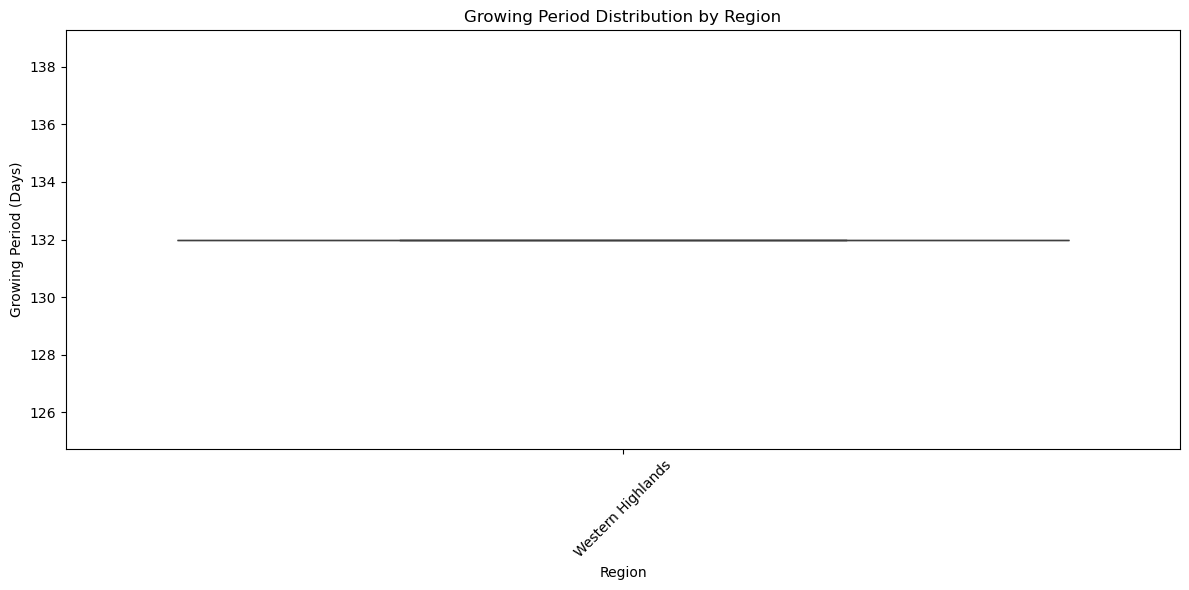

In [16]:
# Plot spatiotemporal distribution
plt.figure(figsize=(12, 6))
sns.boxplot(x='Region', y='Growing_Period_Days', data=df.dropna(subset=['Growing_Period_Days']))
plt.xticks(rotation=45)
plt.title('Growing Period Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Growing Period (Days)')
plt.tight_layout()
plt.show()

In [70]:
# Tabular Data Analysis
print("\n=== Tabular Data Analysis ===")
numeric_cols = df.select_dtypes(include=[np.number]).columns
categorical_cols = df.select_dtypes(include=['object']).columns


=== Tabular Data Analysis ===


In [20]:
# Summary statistics for numeric columns
print("\nSummary Statistics for Numeric Columns:")
print(df[numeric_cols].describe())


Summary Statistics for Numeric Columns:
              Year       NDVI  Rainfall_mm  Avg_Temp_C    Soil_pH  \
count    25.000000  17.000000    25.000000   25.000000  25.000000   
mean   2021.600000   0.747059  1094.200000   23.604000   5.848000   
std       1.384437   0.036532   127.895139    0.985934   0.182848   
min    2018.000000   0.680000   910.000000   21.800000   5.500000   
25%    2021.000000   0.730000   995.000000   22.600000   5.700000   
50%    2022.000000   0.750000  1065.000000   23.900000   5.800000   
75%    2023.000000   0.770000  1200.000000   24.300000   6.000000   
max    2024.000000   0.810000  1350.000000   25.100000   6.200000   

       Organic_Matter_pct  Area_Harvested_ha  Yield_tons_ha  Nitrogen_mg_kg  \
count           25.000000       2.200000e+01      25.000000        8.000000   
mean             2.168000       2.829264e+05       1.992000       81.125000   
std              0.205589       5.315742e+05       0.240087        2.748376   
min              1.80

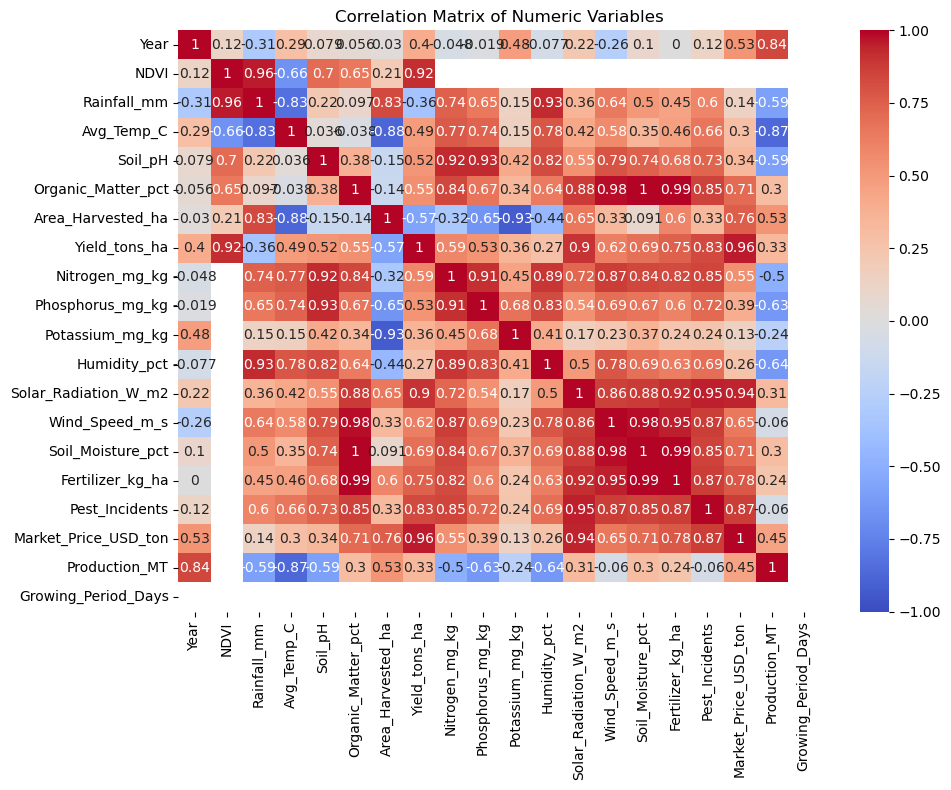

In [22]:
# Correlation matrix for numeric columns
plt.figure(figsize=(10, 8))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Numeric Variables')
plt.tight_layout()
plt.show()

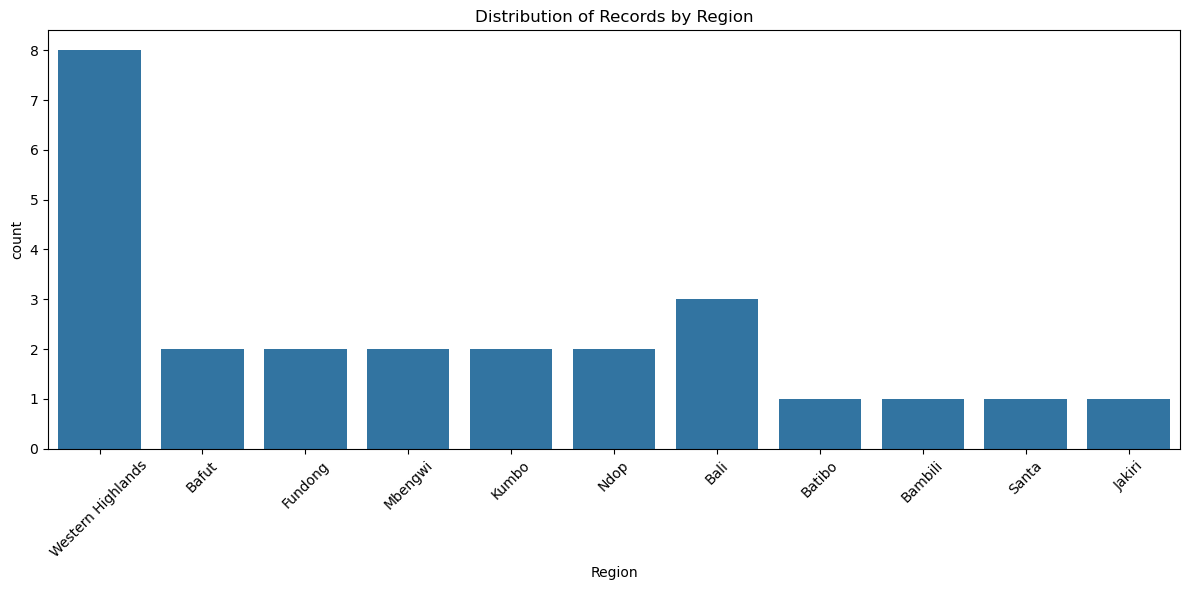

In [24]:
# Count plot for categorical variables
plt.figure(figsize=(12, 6))
sns.countplot(x='Region', data=df)
plt.title('Distribution of Records by Region')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [26]:
from sklearn.preprocessing import StandardScaler

In [28]:
# Initial overview
print("Initial Dataset Shape:", df.shape)
print("\nFirst few rows of the dataset:")
print(df.head())

Initial Dataset Shape: (25, 27)

First few rows of the dataset:
   Year             Region  NDVI  Rainfall_mm  Avg_Temp_C  Soil_pH  \
0  2020  Western Highlands   NaN         1200        22.5      5.8   
1  2021  Western Highlands   NaN         1350        23.0      6.0   
2  2022  Western Highlands   NaN         1100        21.8      5.6   
3  2023  Western Highlands   NaN         1250        22.0      5.9   
4  2024  Western Highlands   NaN         1300        22.3      5.7   

   Organic_Matter_pct  Area_Harvested_ha  Yield_tons_ha Fertilizer_Use  ...  \
0                 2.0          1200000.0           1.70            NaN  ...   
1                 2.2          1250000.0           1.90            NaN  ...   
2                 2.1          1300000.0           1.85            NaN  ...   
3                 2.2          1200000.0           1.80            NaN  ...   
4                 2.1          1250000.0           1.75            NaN  ...   

   Planting_Date  Harvest_Date  Fertiliz

In [30]:
# Check for missing values
print("\nMissing Values per Column:")
print(df.isnull().sum())


Missing Values per Column:
Year                      0
Region                    0
NDVI                      8
Rainfall_mm               0
Avg_Temp_C                0
Soil_pH                   0
Organic_Matter_pct        0
Area_Harvested_ha         3
Yield_tons_ha             0
Fertilizer_Use            8
Nitrogen_mg_kg           17
Phosphorus_mg_kg         17
Potassium_mg_kg          17
Humidity_pct             17
Solar_Radiation_W_m2     19
Wind_Speed_m_s           19
Soil_Moisture_pct        18
Planting_Date            19
Harvest_Date             19
Fertilizer_kg_ha         19
Pest_Incidents           19
Irrigation_Method        19
Market_Price_USD_ton     19
Farmer_Input_Cost_USD    18
Soil_Type                20
Production_MT            21
Growing_Period_Days      19
dtype: int64


In [34]:
# Handle missing values
# Impute numeric columns (e.g., Rainfall_mm, Yield_tons_ha) with median for robustness
numeric_columns = df.select_dtypes(include=[np.number]).columns
for column in numeric_columns:
    df[column] = df[column].fillna(df.groupby('Region')[column].transform('median'))

In [36]:
# Impute categorical columns (e.g., Irrigation_Method) with mode per region
categorical_columns = df.select_dtypes(include=['object']).columns
for column in categorical_columns:
    if df[column].nunique() < 10:
        df[column] = df[column].fillna(df.groupby('Region')[column].transform(lambda x: x.mode()[0] if not x.mode().empty else 'Unknown'))

In [38]:
# Convert date columns to datetime and extract features
date_columns = ['Planting_Date', 'Harvest_Date']
for column in date_columns:
    df[column] = pd.to_datetime(df[column], errors='coerce')
df['Growing_Period_Days'] = (df['Harvest_Date'] - df['Planting_Date']).dt.days

In [40]:
# Encode categorical variables using one-hot encoding
df = pd.get_dummies(df, columns=['Region', 'Irrigation_Method', 'Soil_Type', 'Fertilizer_Use'], drop_first=True)

In [42]:
# Normalize numeric features for modeling
scaler = StandardScaler()
numeric_columns_to_scale = [col for col in numeric_columns if col not in ['Year', 'Production_MT', 'Area_Harvested_ha']]  # Exclude non-ratio variables
df[numeric_columns_to_scale] = scaler.fit_transform(df[numeric_columns_to_scale])

In [44]:
# Drop rows with excessive missing values (e.g., no Yield or key features)
df = df.dropna(subset=['Yield_tons_ha', 'Rainfall_mm', 'NDVI'])

In [46]:
# Check data types and summary statistics
print("\nData Types after Preprocessing:")
print(df.dtypes)
print("\nSummary Statistics for Numeric Columns:")
print(df[numeric_columns].describe())


Data Types after Preprocessing:
Year                                  int64
NDVI                                float64
Rainfall_mm                         float64
Avg_Temp_C                          float64
Soil_pH                             float64
Organic_Matter_pct                  float64
Area_Harvested_ha                   float64
Yield_tons_ha                       float64
Nitrogen_mg_kg                      float64
Phosphorus_mg_kg                    float64
Potassium_mg_kg                     float64
Humidity_pct                        float64
Solar_Radiation_W_m2                float64
Wind_Speed_m_s                      float64
Soil_Moisture_pct                   float64
Planting_Date                datetime64[ns]
Harvest_Date                 datetime64[ns]
Fertilizer_kg_ha                    float64
Pest_Incidents                      float64
Market_Price_USD_ton                float64
Farmer_Input_Cost_USD                object
Production_MT                       float64

In [48]:
# Remove duplicates
print("\nNumber of Duplicate Rows:", df.duplicated().sum())
df = df.drop_duplicates()


Number of Duplicate Rows: 0


In [50]:
import pandas as pd

In [52]:
# Convert date columns to datetime and calculate Growing_Period_Days
df['Planting_Date'] = pd.to_datetime(df['Planting_Date'], errors='coerce')
df['Harvest_Date'] = pd.to_datetime(df['Harvest_Date'], errors='coerce')
df['Growing_Period_Days'] = (df['Harvest_Date'] - df['Planting_Date']).dt.days

In [54]:
# Define categories and their columns
categories = {
    'Satellite Imagery': ['NDVI'],
    'Categorical Data': ['Region', 'Soil_Type', 'Irrigation_Method', 'Fertilizer_Use'],
    'Climate Data': ['Rainfall_mm', 'Avg_Temp_C', 'Humidity_pct', 'Solar_Radiation_W_m2', 'Wind_Speed_m_s', 'Soil_Moisture_pct'],
    'Yield Record': ['Yield_tons_ha', 'Production_MT', 'Area_Harvested_ha'],
    'Soil Properties': ['Soil_pH', 'Organic_Matter_pct', 'Nitrogen_mg_kg', 'Phosphorus_mg_kg', 'Potassium_mg_kg'],
    'Agronomic Practices': ['Planting_Date', 'Harvest_Date', 'Growing_Period_Days', 'Fertilizer_kg_ha', 'Pest_Incidents'],
    'Economic Data': ['Market_Price_USD_ton', 'Farmer_Input_Cost_USD']
}

In [56]:
# Display first five rows for each category in tabular form
for category, columns in categories.items():
    print(f"\n=== {category} ===")
    print(df[columns].head().to_string(index=False))


=== Satellite Imagery ===
     NDVI
-0.199172
 1.211629
-1.892132
-0.763492
 0.647308

=== Categorical Data ===


KeyError: "None of [Index(['Region', 'Soil_Type', 'Irrigation_Method', 'Fertilizer_Use'], dtype='object')] are in the [columns]"

In [58]:
# Check available columns
available_columns = df.columns.tolist()
print("Available columns in the dataset:", available_columns)

Available columns in the dataset: ['Year', 'NDVI', 'Rainfall_mm', 'Avg_Temp_C', 'Soil_pH', 'Organic_Matter_pct', 'Area_Harvested_ha', 'Yield_tons_ha', 'Nitrogen_mg_kg', 'Phosphorus_mg_kg', 'Potassium_mg_kg', 'Humidity_pct', 'Solar_Radiation_W_m2', 'Wind_Speed_m_s', 'Soil_Moisture_pct', 'Planting_Date', 'Harvest_Date', 'Fertilizer_kg_ha', 'Pest_Incidents', 'Market_Price_USD_ton', 'Farmer_Input_Cost_USD', 'Production_MT', 'Growing_Period_Days', 'Region_Bali', 'Region_Bambili', 'Region_Batibo', 'Region_Fundong', 'Region_Jakiri', 'Region_Kumbo', 'Region_Mbengwi', 'Region_Ndop', 'Region_Santa', 'Region_Western Highlands', 'Irrigation_Method_Unknown', 'Soil_Type_Ferralsols', 'Soil_Type_Unknown', 'Fertilizer_Use_Unknown', 'Fertilizer_Use_Yes']


In [60]:
# Define categories based on available columns
categories = {
    'Satellite Imagery': [col for col in ['NDVI'] if col in available_columns],
    'Categorical Data': [col for col in ['Region', 'Soil_Type', 'Irrigation_Method', 'Fertilizer_Use'] if col in available_columns],
    'Climate Data': [col for col in ['Rainfall_mm', 'Avg_Temp_C', 'Humidity_pct', 'Solar_Radiation_W_m2', 'Wind_Speed_m_s', 'Soil_Moisture_pct'] if col in available_columns],
    'Yield Record': [col for col in ['Yield_tons_ha', 'Production_MT', 'Area_Harvested_ha'] if col in available_columns],
    'Soil Properties': [col for col in ['Soil_pH', 'Organic_Matter_pct', 'Nitrogen_mg_kg', 'Phosphorus_mg_kg', 'Potassium_mg_kg'] if col in available_columns],
    'Agronomic Practices': [col for col in ['Planting_Date', 'Harvest_Date', 'Growing_Period_Days', 'Fertilizer_kg_ha', 'Pest_Incidents'] if col in available_columns],
    'Economic Data': [col for col in ['Market_Price_USD_ton', 'Farmer_Input_Cost_USD'] if col in available_columns]
}

In [62]:
# Display first five rows for each category in tabular form
for category, columns in categories.items():
    if columns:  # Only process if there are valid columns
        print(f"\n=== {category} ===")
        print(df[columns].head().to_string(index=False))
    else:
        print(f"\n=== {category} ===\nNo matching columns found in the dataset.")


=== Satellite Imagery ===
     NDVI
-0.199172
 1.211629
-1.892132
-0.763492
 0.647308

=== Categorical Data ===
No matching columns found in the dataset.

=== Climate Data ===
 Rainfall_mm  Avg_Temp_C  Humidity_pct  Solar_Radiation_W_m2  Wind_Speed_m_s  Soil_Moisture_pct
   -0.791630    0.513450           NaN                   NaN             NaN                NaN
   -0.073417    0.099377           NaN                   NaN             NaN                NaN
   -1.469941    1.445113           NaN                   NaN             NaN                NaN
   -0.951232   -0.004141           NaN                   NaN             NaN                NaN
   -0.392623    0.409932           NaN                   NaN             NaN                NaN

=== Yield Record ===
 Yield_tons_ha  Production_MT  Area_Harvested_ha
      0.034008            NaN             1500.0
      0.884218            NaN             1300.0
     -0.816201            NaN             1380.0
     -0.391097            NaN